In [400]:
from h3ronpy.pandas.vector import geodataframe_to_cells, cells_dataframe_to_geodataframe, coordinates_to_cells, cells_to_polygons
from h3ronpy.polars import grid_ring_distances

import geopandas as gpd
import h3
import h3ronpy.polars
import polars as pl

In [25]:
countries_gdf = gpd.read_file('../scratch/simplified-countries-no-antartica.geojson')

In [26]:
countries_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
cells_df = geodataframe_to_cells(countries_gdf, 4)

In [28]:
cells_gdf = cells_dataframe_to_geodataframe(cells_df)

<Axes: >

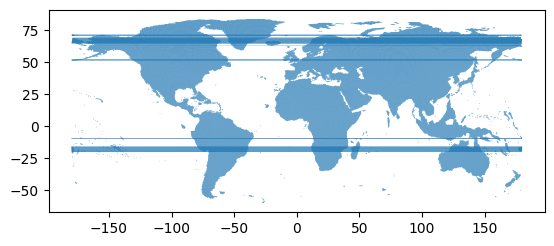

In [47]:
# Looks weird because H3 produces GEOJson that crosses back around the world, instead of going outside of
# the -180 to 180 range, or creating multipolygons
cells_gdf.plot()

In [49]:
# Easiest thing to do for now is just get rid of those cells. Only 35 out of 86962 are affected
def crosses_antimeridian(geometry, threshold=1.0):
    """
    Check if the geometry has coordinates close to both -180 and 180 degrees longitude.
    
    Parameters:
    geometry (shapely.geometry): The geometry to check.
    threshold (float): The longitude proximity to -180 and 180 degrees to consider crossing.
    
    Returns:
    bool: True if the geometry crosses the antimeridian, False otherwise.
    """
    # Get the bounds of the geometry
    minx, miny, maxx, maxy = geometry.bounds
    
    # Check if the geometry is close to -180 and 180
    close_to_minus_180 = minx <= -180 + threshold
    close_to_plus_180 = maxx >= 180 - threshold
    
    return close_to_minus_180 and close_to_plus_180

In [42]:
cells_gdf['crosses_antimeridian'] = cells_gdf.geometry.apply(lambda geom: crosses_antimeridian(geom))

In [50]:
final_cells_gdf = cells_gdf[~cells_gdf['crosses_antimeridian']]

In [231]:
cells_pdf = (
    pl.from_pandas(final_cells_gdf[['id', 'subtype', 'country', 'primary_name', 'primary_source', 'area_id', 'cell']])
    .filter(~(pl.col('cell').eq(598128647563378687) & pl.col('country').eq('AR')))
)

In [197]:
temp_colo_df = (
    pl.read_json('../scratch/cloudflare_dc_colos.json')
    .transpose()
    .unnest('column_0')
    .rename({'cca2':'country'})
)

In [198]:
temp_colo_df = temp_colo_df.with_columns(colo=pl.Series(pl.read_json('../scratch/cloudflare_dc_colos.json').columns))

In [199]:
chinese_colos = (
    pl.DataFrame([
        {
            'colo': 'HYN',
            'city': 'Taizhou',
            'coords': (28.562222,121.428611,)
        },
        {
            'colo': 'TAO',
            'city': 'Qingdao',
            'coords': (36.266111,120.374444,)
        },
        {
            'colo': 'CZX',
            'city': 'Changzhou',
            'coords': (31.912778,119.782222,)
        },
        {
            'colo': 'FOC',
            'city': 'Fuzhou',
            'coords': (25.935, 119.663333,)
        },
        {
            'colo': 'XNN',
            'city': 'Xining',
            'coords': (36.5275, 102.042778,)
        },
        {'colo': 'CSX', 'city': 'Changsha', 'coords': (28.196667, 113.220833,)},
        {'colo': 'LHW', 'city': 'Lanzhou', 'coords': (36.515, 103.62,)},
        {'colo': 'CGD', 'city': 'Changde', 'coords': (28.918889, 111.64,)},
        {'colo': 'SZX', 'city': 'Shenzhen', 'coords': (22.639444, 113.810833,)},
        {'colo': 'FUO', 'city': 'Foshan', 'coords': (23.0825, 113.070833,)},
        {'colo': 'CAN', 'city': 'Guangzhou', 'coords': (23.3925, 113.298889,)},
        {'colo': 'KWE', 'city': 'Guiyang', 'coords': (26.538611, 106.800833,)},
        {'colo': 'SHA', 'city': 'Shanghai', 'coords': (31.198056, 121.336389,)},
        {'colo': 'WHU', 'city': 'Wuhu', 'coords': (31.390556, 118.409444,)},
        {'colo': 'JXG', 'city': 'Jiaxing', 'coords': (30.706667, 120.680556,)},
        {'colo': 'KHN', 'city': 'Xinyu', 'coords': (28.865, 115.9,)},
        {'colo': 'TNA', 'city': 'Jinan', 'coords': (36.857222, 117.216111,)},
        {'colo': 'CKG', 'city': 'Chongqing', 'coords': (29.719167, 106.641667,)},
        {'colo': 'CGO', 'city': 'Zhengzhou', 'coords': (34.519722, 113.840833,)},
        {'colo': 'KMG', 'city': 'Kunming', 'coords': (25.101944, 102.929167,)},
        {'colo': 'SJW', 'city': 'Hengshui', 'coords': (38.280833, 114.696667,)},
        {'colo': 'BHY', 'city': 'Beihai', 'coords': (21.539444, 109.293889,)},
        {'colo': 'HFE', 'city': 'Huainan', 'coords': (31.986667, 116.975,)},
        {'colo': 'TSN', 'city': 'Tianjin', 'coords': (39.124444, 117.346111,)},
        {'colo': 'PKX', 'city': 'Langfang', 'coords': (39.509167, 116.410556,)},
        {'colo': 'TYN', 'city': 'Yangquan', 'coords': (37.746944, 112.628333,)},
        {'colo': 'HGH', 'city': 'Shaoxing', 'coords': (30.237111, 120.431944,)},
        {'colo': 'HAK', 'city': 'Haikou', 'coords': (19.934722, 110.458889,)},
        {'colo': 'ZGN', 'city': 'Zhongshan', 'coords': (22.5686, 113.479,)},
        {'colo': 'XFN', 'city': 'Xiangyang', 'coords': (32.15, 112.290556,)},
        {'colo': 'DLC', 'city': 'Dalian', 'coords': (38.965556, 121.538333,)},
    ])
    .with_columns(
        country=pl.lit('CN'), region=pl.lit('Mainland China'), name=(pl.col('city') + pl.lit(', China')),
        lat=pl.col('coords').list.first(), lon=pl.col('coords').list.last()
    ).select(pl.col(['country', 'city', 'lat', 'lon', 'name', 'region', 'colo']))
)

In [239]:
temp_colo_df = pl.concat([
    temp_colo_df.filter(~pl.col('name').is_in(chinese_colos['name'])),
    chinese_colos
])

In [249]:
colo_df = temp_colo_df.with_columns(
    cell=pl.Series(coordinates_to_cells(temp_colo_df['lat'], temp_colo_df['lon'], 4)),
    distance=pl.lit(0)
)

In [250]:
assert cells_pdf.join(colo_df, on='cell', how='inner').shape[0] == colo_df.shape[0], 'Cells from Colo DF missing from world cell set'

In [388]:
existing_cells = set(colo_df['cell'])

In [389]:
good_cells = colo_df # .with_columns(cell_str=pl.col('cell').h3.cells_to_string())

In [390]:
step_df = colo_df

In [393]:
count = 0
while step_df.shape[0]:
    step_df = (
        step_df
        .with_columns(step=pl.col('cell').h3.grid_disk(1))
        .explode('step')
        .filter(~pl.col('step').eq(pl.col('cell'))) # Filter out the center of this ring
        .with_columns(pl.col('distance') + 1) # Calc the distance
        .filter(~pl.col('step').is_in(good_cells['cell'])) # Filter out cells already traversed
        .sample(fraction=1.0, seed=42) # Shuffle the dataframe
        .group_by('step', maintain_order=True).first() # Take the first cell in a group, to deduplicate cells in rings
        .select(pl.exclude('cell'))
        .rename({'step':'cell'})
        .select(pl.col(['country', 'city', 'lat', 'lon', 'name', 'region', 'colo', 'cell', 'distance']))
    )
    good_cells = pl.concat([good_cells, step_df])
    print(count, step_df.shape[0], good_cells.shape[0])
    count += 1

0 1898 2227
1 3575 5802
2 4802 10604
3 5641 16245
4 6050 22295
5 6150 28445
6 6081 34526
7 5999 40525
8 5936 46461
9 5819 52280
10 5732 58012
11 5653 63665
12 5568 69233
13 5411 74644
14 5361 80005
15 5251 85256
16 5161 90417
17 4987 95404
18 4837 100241
19 4686 104927
20 4521 109448
21 4422 113870
22 4285 118155
23 4181 122336
24 4101 126437
25 4018 130455
26 3950 134405
27 3876 138281
28 3767 142048
29 3742 145790
30 3708 149498
31 3698 153196
32 3695 156891
33 3672 160563
34 3661 164224
35 3595 167819
36 3585 171404
37 3551 174955
38 3495 178450
39 3437 181887
40 3315 185202
41 3229 188431
42 3184 191615
43 3133 194748
44 3091 197839
45 3018 200857
46 2968 203825
47 2909 206734
48 2824 209558
49 2768 212326
50 2731 215057
51 2688 217745
52 2547 220292
53 2469 222761
54 2375 225136
55 2307 227443
56 2246 229689
57 2190 231879
58 2148 234027
59 2101 236128
60 2067 238195
61 2036 240231
62 1967 242198
63 1866 244064
64 1828 245892
65 1774 247666
66 1737 249403
67 1687 251090
68 1580 25

In [447]:
final_cells = (
    good_cells
    .filter(pl.col('cell').is_in(cells_pdf['cell']))
    #.group_by(['country', 'city', 'lat', 'lon', 'name', 'region', 'colo'])
    #.agg(pl.col('cell'))
    .select(pl.exclude('distance'))
    .to_pandas()
)

In [458]:
final_cell_gpd = cells_dataframe_to_geodataframe(final_cells, 'cell').drop('cell', axis=1)

In [461]:
# Slight errors on the border of H3 cells, particularly near borders of the high level triangles,  cause the lines to 
# not match up. So when dissolving below, partial borders get left behind. Adding a small buffer to each H3 cell
# gets rid of the issue, with an acceptable level of error.
final_cell_gpd['geometry'] = final_cell_gpd['geometry'].to_crs(epsg=3857).buffer(0.0001).to_crs(epsg=4326)

In [462]:
final_colo_gpd = final_cell_gpd.dissolve(by='colo')

In [463]:
final_colo_gpd.to_file('../scratch/fixed-colo.geojson', driver='GeoJSON')